## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
converted_prop = df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()
converted_prop

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
sum(df.isnull().values.any(axis=1))

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) != False]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

In [12]:
#checking number of duplicate user ids
sum(df2.duplicated(['user_id']))

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicateDFRow = df2[df2.duplicated(['user_id'])]
duplicateDFRow['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
print(duplicateDFRow)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset = 'user_id', keep = False, inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#proportion of old landing pages in df2 dataset
prop_old = len(df2[df2['landing_page'] == 'old_page'])/len(df2)
prop_old

0.4999397762429323

In [18]:
#proportion of new landing pages in df2 dataset
prop_new = len(df2[df2['landing_page'] == 'new_page'])/len(df2)
prop_new

0.5000602237570677

In [19]:
#proportion of old landing pages that was converted
prop_old_conv = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])/len(df2[df2['landing_page'] == 'old_page'])
prop_old_conv

0.1203863045004612

In [20]:
#proportion of new landing pages that was converted
prop_new_conv = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])/len(df2[df2['landing_page'] == 'new_page'])
prop_new_conv

0.11880888313869065

In [21]:
#calculating probability of conversion irrespective of page type
prob_conversion = (prop_old * prop_old_conv) + (prop_new * prop_new_conv)
prob_conversion

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
#probabilty of conversion given an individual is in the control group
prob_control_conv = len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'control'])
prob_control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
#probabilty of conversion given an individual is in the control group
prob_treatment_conv = len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'treatment'])
prob_treatment_conv

0.11880888313869065

d. What is the probability that an individual received the new page?

In [24]:
#probability of receiving the new page
prob_new_page = len(df2[(df2['landing_page'] == 'new_page')])/len(df2)
prob_new_page

0.5000602237570677

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Analysis of the results from Probability calculations**

**The control and treatment groups are almost exactly equal in size given that the probability of receiving the new page is 0.5001 (50.01%). The groups are balanced. 
On an average, the probability of conversion regardless of the page is 0.1196 (11.96%). The control group showed a higher rate of conversion with a probability of 0.1204 (12.04%) whereas the treatment group showed a slightly lower rate of conversion with a probability of 0.1188 (11.88%). This means the control group with the old page fared better in conversions that the treatment group's new page. But the margins are very small. Therefore, there is not sufficient evidence to conclude that the new treatment page leads to more conversions.**



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**Null Hypothesis** **$H_0$** : **$p_{new}$** - **$p_{old}$** **$\leq$** **0**

Null Hypothesis is that the conversion rate for the new page is less than or equal to the conversion rate for the old page


**Alternative Hypothesis** **$H_1$** :   **$p_{new}$** - **$p_{old}$** > 0 

Alternative Hypothesis is that the conversion rate for the new page is greater than the conversion rate for the old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
#conversion rate for new pages - p(new)
p_new = (prop_old * prop_old_conv) + (prop_new * prop_new_conv)
p_new

0.11959749882133504

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
#conversion rate for old pages - p(old)
p_old = (prop_old * prop_old_conv) + (prop_new * prop_new_conv)
p_old

0.11959749882133504

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
p_new_sample = new_page_converted.mean()
p_old_sample = old_page_converted.mean()
p_new_sample - p_old_sample

-0.0011859588238503638

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [37]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

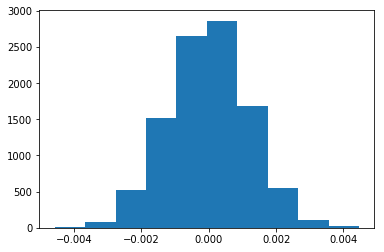

In [38]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
obs_diff = df2.query('group == "treatment"')['converted'].mean()-df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015774213617705535

In [40]:
(p_diffs > obs_diff).mean()

0.90369999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Interpretation of value calculated in part j**

**This value is called the p value. p-value is the probability of obtaining the observed statistic or more extreme values from the null hypothesis. If the p-value is really small, it means it is less likely that it came from the null hypothesis and more likely that it came from the alternative hypothesis and therefore, we say that we reject the null hypothesis. If it is large, then we fail to reject the null hypothesis.
For statistically significant results, the p-value must be smaller than alpha (the Type I error rate) for us to favour the alternative hypothesis. In our case, we are given the Type I error rate as 5%. Our p-value is 0.9037 or 90.37%. This is significantly higher than the type I error rate at 5%. Therefore, we can safely safe that we fail to reject the null hypothesis. This means that there is no statistically significant difference between the old and new pages and that the new pages don't have a better conversion rate.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3102408579271012, 0.90494281611597494)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Interpretation of z-score and p-value from part m**

**The z-score indicates where the actual mean lies compared to value assumed in the null hypothesis in terms of the standard deviation. In the null hypothesis, we assumed the differences between the two proportions for the new and old pages to be zero. The z-score of -1.3102 shows that the actual proportion lies 1.3102 standard deviations below the assumed value of 0. The corresponding p-value of 0.9049 indicates that 90.49% of the values lie above this actual proportion, indicating that the null hypothesis of zero value falls in this range and hence that it comes from the null.**

**This agrees with the findings in parts j. and k. We got the p-value in parts j. and k. as 0.9072, whereas here we got it as 0.9049. Both indicate that the p-value is significantly higher than the Type I error rate (alpha) of 5% and therefore, we fail to reject the null hypothesis.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the response variable to be predicted is a categorical one with only two outcomes (conversion or no conversion), we use Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# setting the intercept column in df2 dataframe
df2['intercept'] = 1

# Outputting a value of 0 if it is in the control group and 1 when it is in the treatment group
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-11 19:49 AIC:              212780.0972
No. Observations:   290583           BIC:              212801.2565
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3102  0.1901  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Answer to part e.**

**The p-value associated with ab_page is 0.1901. This is different from the earlier p-value in Part II. The difference arises because of the difference in null and alternative hypotheses in Part II versus the regression model. In Part II, the alternative hypothesis was whether the new page had a higher proportion of conversion than the old page and the null hypothesis was whether the new page had the same or lower proportion of conversion.
In the Regression model, the null hypothesis is that being in the treatment group is not statistically significant in predicting whether the page is converted or not and the alternative hypothesis is that being in the treatment grou is statistically significant in predicting whether the page is converted or not. We see that the p-value calculated in the Regression model is higher than the 5% Type I error rate and there confirms our earlier results that being in the treatment group is not statistically significant in predicting conversion.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer to part f.**

**It is a good idea to consider other factors to add to the regression model since the response variable may be dependent on multiple factors beyond the ones originally considered. Adding new factors can cause a reduction in the bias of coefficient estimates caused by taking only limited variables. This can help in determining the relative influence of multiple explanatory variables.
There are multiple disadvantages to adding additional terms to the regression model. A relationship may not exist between the newly added variables and the response variable and if the data is limited, it may lead to spurious results. If we falsely conclude correlation as leading to causation, the conclusions may be incorrect. In addition, outliers and non-constant variance can lead to incorrect correlation results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
#reading in the countries files to df_country dataframe
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
#checking the unique values in country column of df_country dataframe
df_country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
df_country[['CA', 'UK', 'US']] = pd.get_dummies(df_country['country'])
df_country.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [49]:
df_new = df_country.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
df_new.tail()

,country,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,
653118,US,0,0,1,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,0,1,0,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,0,1,0,2017-01-09 18:07:34.253935,control,old_page,0,1,0
655535,CA,1,0,0,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1
934996,UK,0,1,0,2017-01-09 00:30:08.377677,control,old_page,0,1,0


In [51]:
model_2 = sm.Logit(df_new.converted, df_new[['intercept','ab_page','US','UK']])
result_2 = model_2.fit()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


In [52]:
result_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-11 19:50 AIC:              212780.8724
No. Observations:   290583           BIC:              212823.1910
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2489  0.0000  -2.0822  -1.9779
ab_page       -0.0149    0.0114   -1.3062  0.1915  -0.0373   0.0075
US             0.0408    0.0269    1.5163  0.1294  -0.0119   0.0935
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**Conclusions based on Logistic Regression model with Country added as a variable**

**We see that addinng the country as a explanatory variable in the regression model has changed the p-value for the ab_page only very slightly, still being significantly above the Type I error rate at 5%. Also, the p-values for US and UK variables are also higher than Type I error rate but the p-value for UK comes close at 7.45%. From these values, we can conclude that none of these variables are statistically significant in determining the conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
df_new['ab_page_US'] = df_new['US'] * df_new['ab_page']
df_new['ab_page_UK'] = df_new['UK'] * df_new['ab_page']

In [54]:
model_3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','ab_page_US','ab_page_UK']])
result_3 = model_3.fit()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


In [55]:
result_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-11 19:54 AIC:              212778.6861
No. Observations:   290583           BIC:              212821.0046
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
ab_page_US    0.0644    0.0384     1.6790  0.0931  -0.0108   0.1396
ab_page_UK    0.0901    0.0405     2.2252  0.0261   0.0107   0.1694
==================================================================

"""

**Conclusions based on Logistic Regression model with Country and interaction variable also added**

**Upon adding the interaction variable between country and the group (ab_page), we see statistically significant results. ab_page shows a p-value of 0.0295 (2.95%) which is lower than the Type I error rate (alpha) at 5%. Since the baseline country is chosen as Canada, it means that the country being Canada has a statistical significance on the conversion. Similarly, ab_page_UK shows a p-value of 0.0261 (2.61%) which is also lower than the threshold alpha rate. Indicating that when the country is UK, there is a significant statistical impact on the conversion. Thus, we can conclude the country being Canada or UK has a statistical significance when the page is from the treatment group.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0